<a href="https://colab.research.google.com/github/shoushinkk/-Machine-Learning/blob/main/%D0%9F%D1%80%D0%BE%D0%BA%D0%BE%D0%BF%D0%B5%D0%BD%D0%BA%D0%BE%D0%9A_%D0%9F%D0%A08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163352 sha256=e210ea86653b620c46c9d9b09374f778f97b17c3079ce0efd47bbe12f85d211d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
from surprise import Dataset, Reader, SVD, SVDpp, NMF, KNNWithZScore, BaselineOnly
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [3]:
#Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір.
svd = SVD()
svdpp = SVDpp()
nmf = NMF()
knn_with_zscore = KNNWithZScore()
baseline_only = BaselineOnly()

In [4]:
#Найкращі параметри для всіх алгоритмів підберіть за допомогою крос-валідації.
cv_svd = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
cv_svdpp = cross_validate(svdpp, data, measures=['RMSE'], cv=5, verbose=True)
cv_nmf = cross_validate(nmf, data, measures=['RMSE'], cv=5, verbose=True)
cv_knn_with_zscore = cross_validate(knn_with_zscore, data, measures=['RMSE'], cv=5, verbose=True)
cv_baseline_only = cross_validate(baseline_only, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9316  0.9368  0.9385  0.9452  0.9347  0.9374  0.0046  
Fit time          3.36    1.36    1.79    1.87    1.56    1.99    0.71    
Test time         0.12    0.26    0.22    0.26    0.21    0.21    0.05    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9155  0.9239  0.9156  0.9160  0.9243  0.9190  0.0041  
Fit time          26.75   27.06   27.03   27.21   27.66   27.14   0.30    
Test time         4.16    4.97    4.20    4.74    4.43    4.50    0.31    
Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9619  0.9632  0.9659  0.9611  0.9639  0.9632  0.0017  
Fit time          2.62    2.10    2.35    2.14    2.81    2.40    0.28    
Test time         0.10    

In [5]:
svd_rmse = cv_svd['test_rmse'].mean()
svdpp_rmse = cv_svdpp['test_rmse'].mean()
nmf_rmse = cv_nmf['test_rmse'].mean()
knn_with_zscore_rmse = cv_knn_with_zscore['test_rmse'].mean()
baseline_only_rmse = cv_baseline_only['test_rmse'].mean()

print("SVD RMSE:", svd_rmse)
print("SVD++ RMSE:", svdpp_rmse)
print("NMF RMSE:", nmf_rmse)
print("KNNWithZScore RMSE:", knn_with_zscore_rmse)
print("BaselineOnly RMSE:", baseline_only_rmse)

SVD RMSE: 0.9373746848570818
SVD++ RMSE: 0.919049003941999
NMF RMSE: 0.9631666803112007
KNNWithZScore RMSE: 0.9501574782451309
BaselineOnly RMSE: 0.9441544264350142


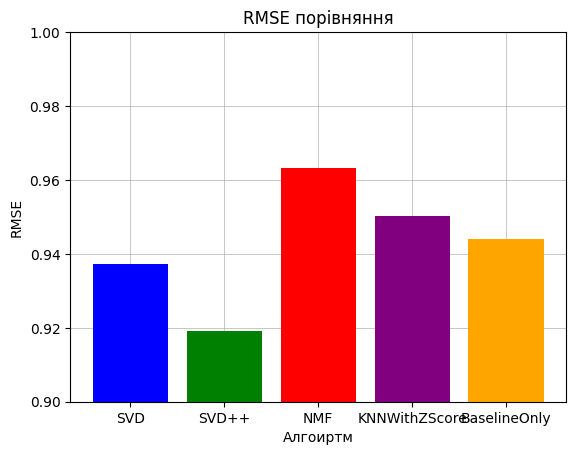

In [6]:
#Зробіть візуалізацію.
rmse_values = [svd_rmse, svdpp_rmse, nmf_rmse, knn_with_zscore_rmse, baseline_only_rmse]
algos = ['SVD', 'SVD++', 'NMF', 'KNNWithZScore', 'BaselineOnly']

plt.bar(algos, rmse_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta'])
plt.xlabel('Алгоиртм')
plt.ylabel("RMSE")
plt.title('RMSE порівняння')
plt.ylim(0.9, 1.0)
plt.gca().set_axisbelow(True)
plt.grid(linewidth=0.5)
plt.show()

Висновок: розробили рекомендаційну систему за допомогою бібліотеки surprise, використали різні алгоритми та візуалізували їх роботу.